In [11]:
# %pip install CoolProp
# %pip install seaborn
# %pip install openpyxl

In [12]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os
import re
import seaborn
import pickle
pf.__version__

'0.0.90'

In [13]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

MasterFolder=os.getcwd()

# rep_FI_path=os.path.join(Helperfile_folder, "Leilani_repeated_names.xlsx") #r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Helper_files\Leilaini_repeated_names.xlsx"

#Folder to save figures

figpath=MasterFolder +'\Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

#Folder to save full datasets

compilation_folder=MasterFolder +'\Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

In [14]:
## This function compiles raman sessions found in the master folder (even in subdirectories of the specified folder)
def compile_Raman_sessions(*, path=None, sheet_name='Sheet1', keyword='Raman_session'):
    df = pd.DataFrame()

    for root, dirs, files in os.walk(path):
        for file in files:
            if keyword in file and file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                sheets = pd.read_excel(file_path, sheet_name)
                df = pd.concat([df, sheets], axis=0, ignore_index=True)
                unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
                df = df.drop(columns=unnamed_columns)

    return df

In [15]:
kamaehu = compile_Raman_sessions(path=MasterFolder,sheet_name='Sheet1',keyword='Raman')

kamaehu = kamaehu[~kamaehu['filename'].str.contains('test')]

kamaehu.to_excel(compilation_folder+'/'+"Kamae'huakanaloa.xlsx")

kamaehu=kamaehu[~(kamaehu['σ Density g/cm3']>0.04)]

kamaehu

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,preferred_values,lower_values,upper_values,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name_x,Model_name_y,SO2_Diad_Ratio,SO2_mol_ratio
0,187-1-102-A--Spectrum--019,0.306219,0.004375,0.003689,0.002351,103.498025,0.008672,0.000506,0.008675,6.018,...,0.997878,0.997874,0.997883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187-1-102-A--Spectrum--020,0.292874,0.004650,0.004011,0.002353,103.466569,0.009480,0.000505,0.009487,5.986,...,0.997874,0.997869,0.997879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187-1-102-A--Spectrum--021,0.297566,0.004446,0.003773,0.002352,103.477647,0.008901,0.000504,0.008905,5.969,...,0.997871,0.997866,0.997876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187-1-102-B--Spectrum--025,0.364090,0.017305,0.017145,0.002349,103.632471,0.039347,0.000502,0.039428,5.988,...,0.997863,0.997858,0.997868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187-1-102-B--Spectrum--026,0.342384,0.012971,0.012756,0.002349,103.582423,0.029547,0.000501,0.029606,5.985,...,0.997859,0.997854,0.997864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,187-1-205-MI2-unquantdiad,0.042435,0.030633,0.030390,0.003853,102.857350,0.076695,0.000671,0.076852,12.008,...,0.997930,0.997924,0.997937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,187-1-206-MI1,0.117898,0.005228,0.003565,0.003824,103.047797,0.008996,0.000681,0.008989,11.994,...,0.997927,0.997920,0.997933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,FG19-101-A-50X-rep4,0.954924,0.004101,0.003779,0.001593,105.021076,0.012280,0.000702,0.012286,6.005,...,0.997924,0.997917,0.997931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,FG19-101-A-50X-rep5,0.959471,0.003801,0.003451,0.001594,105.035928,0.011330,0.000705,0.011331,6.004,...,0.997923,0.997916,0.997930,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
kamaehu['date_object']=pd.to_datetime(kamaehu['date'])

kamaehu=kamaehu.sort_values(by=['date_object', 'filename'])
# kamaehu.to_clipboard(excel=True, index=False)
kamaehu


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,lower_values,upper_values,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name_x,Model_name_y,SO2_Diad_Ratio,SO2_mol_ratio,date_object
273,L87-1-101-reg1-FIA-r1,0.312706,0.004052,0.003301,0.002351,103.513255,0.007739,0.000408,0.007746,6.006,...,0.997749,0.997756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
274,L87-1-101-reg1-FIA-r2,0.309983,0.003201,0.002172,0.002351,103.506866,0.005099,0.000408,0.005094,6.006,...,0.997747,0.997755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
275,L87-1-101-reg1-FIA-r3,0.306707,0.003197,0.002167,0.002351,103.499173,0.005093,0.000408,0.005088,6.007,...,0.997745,0.997753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
276,L87-1-101-reg1-FIB-r1,0.230534,0.004543,0.003881,0.002361,103.317495,0.009387,0.000408,0.009399,6.001,...,0.997744,0.997752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
277,L87-1-101-reg1-FIB-r2,0.230283,0.004610,0.003960,0.002361,103.316889,0.009577,0.000409,0.009590,6.000,...,0.997743,0.997751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,FG19-101-A-rep2,0.931898,0.003619,0.003250,0.001590,104.948101,0.010053,0.000895,0.010033,6.026,...,0.997939,0.997956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-06
366,FG19-101-A-rep3,0.928945,0.003942,0.003607,0.001590,104.938996,0.011088,0.000889,0.011075,6.036,...,0.997937,0.997954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-06
389,FG19-101-A-rep4,0.944029,0.004218,0.003906,0.001592,104.986098,0.012393,0.000981,0.012380,6.020,...,0.997899,0.997918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-06
390,FG19-101-A-rep5,0.942087,0.006136,0.005926,0.001592,104.979947,0.018723,0.000986,0.018736,6.028,...,0.997899,0.997918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-06


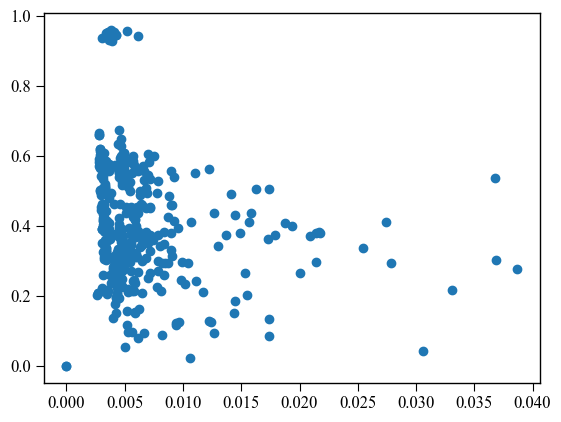

In [17]:
plt.scatter(kamaehu['σ Density g/cm3'],kamaehu['Density g/cm3'])

In [18]:
rep_FI_names=pd.read_excel('Helper_file.xlsx')
kamaehu_reps=pd.merge(kamaehu,rep_FI_names, on='filename')
kamaehu_reps

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Model_name_y,SO2_Diad_Ratio,SO2_mol_ratio,date_object,FI_name,Sample,Crystal,Region,FI#,Unnamed: 6
0,L87-1-101-reg1-FIA-r1,0.312706,0.004052,0.003301,0.002351,103.513255,0.007739,0.000408,0.007746,6.006,...,NaN,NaN,NaN,2024-01-04,L87-1-101-reg1-FIA,187-1,101.0,reg1,FIA,NaN
1,L87-1-101-reg1-FIA-r2,0.309983,0.003201,0.002172,0.002351,103.506866,0.005099,0.000408,0.005094,6.006,...,NaN,NaN,NaN,2024-01-04,L87-1-101-reg1-FIA,187-1,101.0,reg1,FIA,NaN
2,L87-1-101-reg1-FIA-r3,0.306707,0.003197,0.002167,0.002351,103.499173,0.005093,0.000408,0.005088,6.007,...,NaN,NaN,NaN,2024-01-04,L87-1-101-reg1-FIA,187-1,101.0,reg1,FIA,NaN
3,L87-1-101-reg1-FIB-r1,0.230534,0.004543,0.003881,0.002361,103.317495,0.009387,0.000408,0.009399,6.001,...,NaN,NaN,NaN,2024-01-04,L87-1-101-reg1-FIB,187-1,101.0,reg1,FIB,NaN
4,L87-1-101-reg1-FIB-r2,0.230283,0.004610,0.003960,0.002361,103.316889,0.009577,0.000409,0.009590,6.000,...,NaN,NaN,NaN,2024-01-04,L87-1-101-reg1-FIB,187-1,101.0,reg1,FIB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,FG19-101-A-rep2,0.931898,0.003619,0.003250,0.001590,104.948101,0.010053,0.000895,0.010033,6.026,...,NaN,NaN,NaN,2024-05-06,FG19-101-A-start,FG19,101.0,NaN,A,NaN
385,FG19-101-A-rep3,0.928945,0.003942,0.003607,0.001590,104.938996,0.011088,0.000889,0.011075,6.036,...,NaN,NaN,NaN,2024-05-06,FG19-101-A-start,FG19,101.0,NaN,A,NaN
386,FG19-101-A-rep4,0.944029,0.004218,0.003906,0.001592,104.986098,0.012393,0.000981,0.012380,6.020,...,NaN,NaN,NaN,2024-05-06,FG19-101-A-end,FG19,101.0,NaN,A,NaN
387,FG19-101-A-rep5,0.942087,0.006136,0.005926,0.001592,104.979947,0.018723,0.000986,0.018736,6.028,...,NaN,NaN,NaN,2024-05-06,FG19-101-A-end,FG19,101.0,NaN,A,NaN


In [19]:
grouped = kamaehu_reps.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = kamaehu_reps.select_dtypes(include='number')
non_numeric_cols = kamaehu_reps.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_kamaehu_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_kamaehu_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_kamaehu_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate kamaehu_averageds and reindex columns to the original order
kamaehu_averaged = pd.concat([numeric_kamaehu_averaged_mean, non_numeric_kamaehu_averaged], axis=1)
kamaehu_averaged = kamaehu_averaged.reindex(columns=kamaehu_reps.columns)

# Add standard deviation columns after reindexing
kamaehu_averaged = pd.concat([kamaehu_averaged, numeric_kamaehu_averaged_std.add_suffix('_std')], axis=1)

# Reset index to get a DataFrame
kamaehu_averaged = kamaehu_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
kamaehu_averaged = pd.merge(kamaehu_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
kamaehu_averaged['averaged?'].fillna('No', inplace=True)

kamaehu_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_averaged.xlsx")

kamaehu_averaged.head()


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,preferred_values_std,lower_values_std,upper_values_std,Peak_Cent_SO2_std,Peak_Area_SO2_std,Peak_Height_SO2_std,SO2_Diad_Ratio_std,SO2_mol_ratio_std,Crystal_std,averaged?
0,186-11-121-A,0.423520,0.003126,0.002062,0.002349,103.767103,0.004610,0.000856,0.004539,6.042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,186-11-121-B,0.336635,0.003349,0.002387,0.002350,103.569091,0.005543,0.000855,0.005488,6.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,186-11-121-C,0.324272,0.003129,0.002066,0.002350,103.540312,0.004823,0.000856,0.004756,6.047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,186-11-121-D-rep1,0.355721,0.003178,0.002134,0.002349,103.613215,0.004913,0.000859,0.004847,6.047,...,0.000001,0.000001,0.000001,NaN,NaN,NaN,NaN,NaN,0.0,Yes
4,186-11-121-E,0.314850,0.005547,0.005024,0.002351,103.518281,0.011771,0.000858,0.011764,6.049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


Processing:   0%|          | 0/232 [00:00<?, ?it/s]

Processing: 100%|██████████| 232/232 [01:32<00:00,  2.50it/s]


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,186-11-121-A,0.423520,7.223525,1.629844,1.624074,1.623914,0.131750,0.130769,7.241523,7.252465,0.689571,0.692123,100,0.003126,5.0,1423.15,0.423520,None,2300,SW96
1,186-11-121-B,0.336635,5.236362,1.181480,1.180554,1.182782,0.092437,0.090733,5.249563,5.224072,0.503796,0.472873,100,0.003349,5.0,1423.15,0.336635,None,2300,SW96
2,186-11-121-C,0.324272,4.982428,1.124185,1.124826,1.125032,0.088771,0.087828,4.999124,5.002097,0.470771,0.481146,100,0.003129,5.0,1423.15,0.324272,None,2300,SW96
3,186-11-121-D-rep1,0.355721,5.641603,1.272915,1.273372,1.270482,0.103838,0.106152,5.659731,5.633422,0.540271,0.533810,100,0.003178,5.0,1423.15,0.355721,None,2300,SW96
4,186-11-121-E,0.314850,4.793243,1.081499,1.082255,1.084234,0.090149,0.091533,4.807987,4.806841,0.474382,0.487352,100,0.005547,5.0,1423.15,0.314850,None,2300,SW96


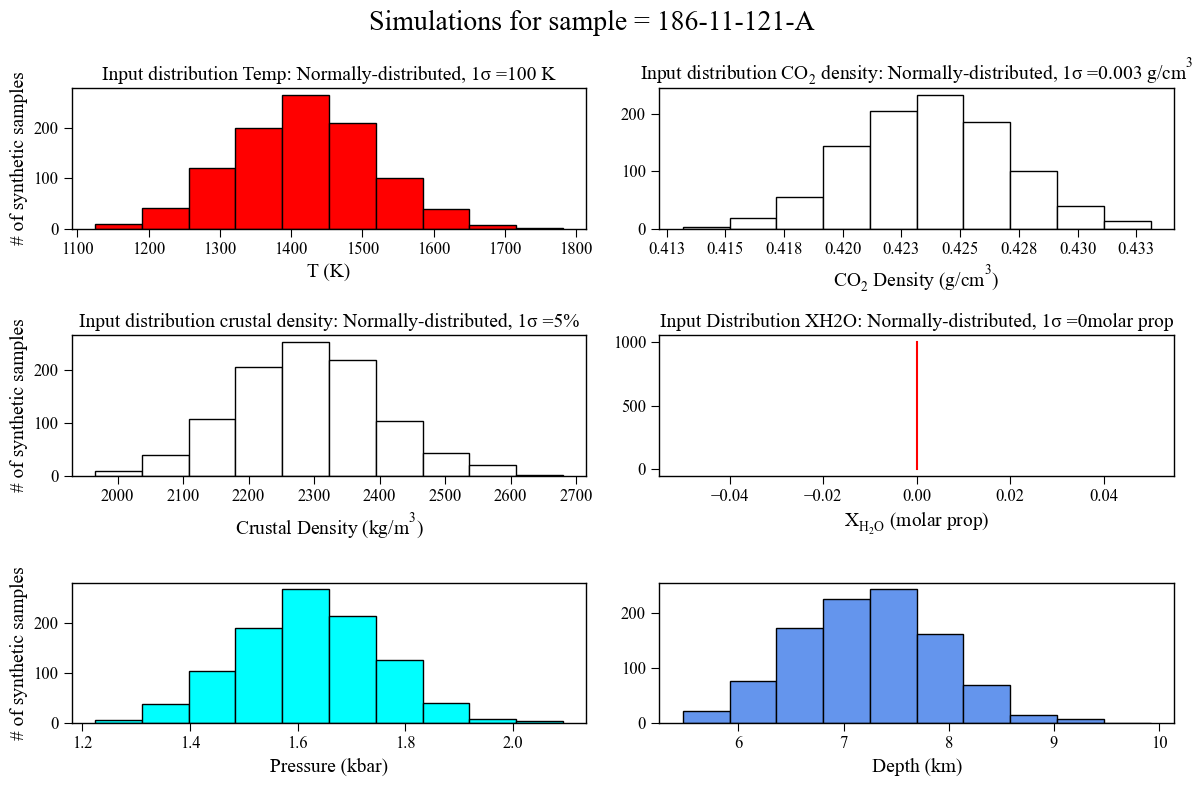

In [20]:

MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.propagate_FI_uncertainty(T_K=1150+273.15,
error_CO2_dens=kamaehu_averaged['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=100, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2300,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=kamaehu_averaged['Density g/cm3'],

sample_ID=kamaehu_averaged['filename'],
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CD.head()


You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 2006. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS


Processing: 100%|██████████| 232/232 [1:19:14<00:00, 20.49s/it]


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,...,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS,error_XH2O,error_type_XH2O,error_dist_XH2O
0,186-11-121-A,0.423520,8.285259,1.869403,1.866397,1.864917,0.201918,0.191654,8.304090,8.315376,...,0.003126,5.0,1423.15,0.423520,None,2300,SW96,0.05,Abs,normal
1,186-11-121-B,0.336635,5.917930,1.335263,1.341913,1.339124,0.144368,0.148873,5.963419,5.938660,...,0.003349,5.0,1423.15,0.336635,None,2300,SW96,0.05,Abs,normal
2,186-11-121-C,0.324272,5.620571,1.268170,1.271445,1.270597,0.137425,0.137196,5.646860,5.627994,...,0.003129,5.0,1423.15,0.324272,None,2300,SW96,0.05,Abs,normal
3,186-11-121-D-rep1,0.355721,6.394953,1.442893,1.446323,1.439015,0.157404,0.151546,6.426332,6.352677,...,0.003178,5.0,1423.15,0.355721,None,2300,SW96,0.05,Abs,normal
4,186-11-121-E,0.314850,5.399819,1.218361,1.223519,1.216594,0.127100,0.126157,5.429838,5.385117,...,0.005547,5.0,1423.15,0.314850,None,2300,SW96,0.05,Abs,normal


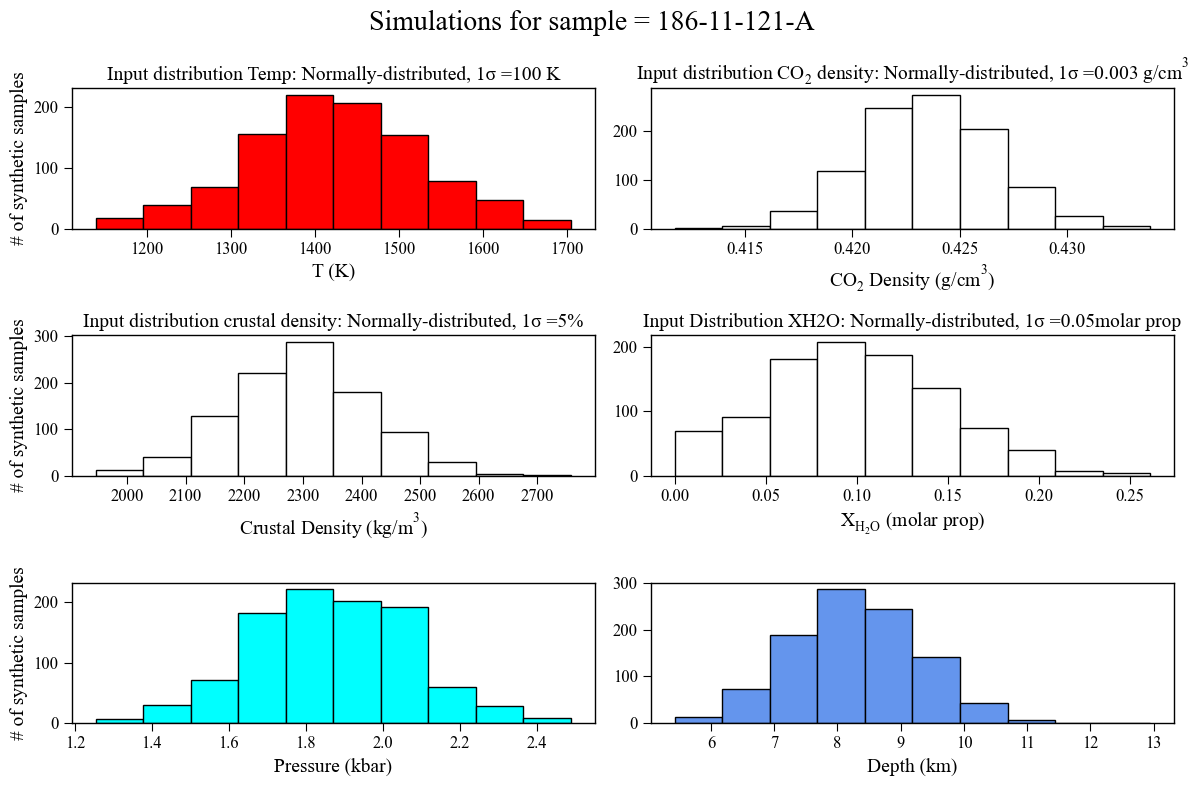

In [21]:

MC_Av_rho_T_CDH, MC_All_rho_T_CDH, fig=pf.propagate_FI_uncertainty(T_K=1150+273.15,
error_CO2_dens=kamaehu_averaged['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=100, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2300,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=kamaehu_averaged['Density g/cm3'],
sample_ID=kamaehu_averaged['filename'],
XH2O=0.1, error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',  
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CDH.head()


In [22]:
kamaehu_PMC=pd.merge(left=kamaehu_averaged,right=MC_Av_rho_T_CD, left_on='filename',right_on='Filename')

kamaehu_PMC_XH2O=pd.merge(left=kamaehu_averaged,right=MC_Av_rho_T_CDH, left_on='filename',right_on='Filename')


<ErrorbarContainer object of 3 artists>

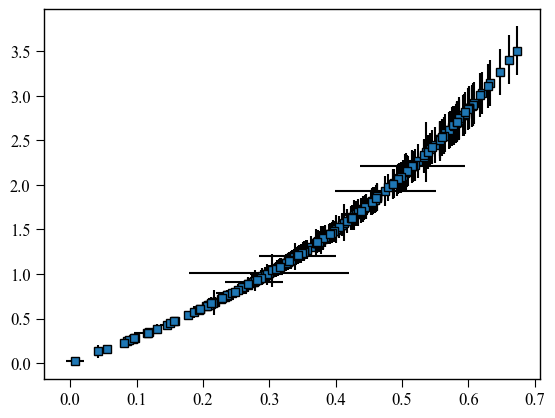

In [23]:
avgFI=kamaehu_PMC['averaged?']=='Yes'
notavgFI=kamaehu_PMC['averaged?']=='No'

# plt.errorbar(kamaehu_PMC['Density g/cm3'],kamaehu_PMC['Mean_MC_D_km'],xerr=kamaehu_PMC['Density g/cm3_std'],yerr=kamaehu_PMC['std_dev_MC_D_km'],linestyle='',fmt='s',ecolor='k',mec='k')
plt.errorbar(kamaehu_PMC['Density g/cm3'][~kamaehu_PMC['filename'].str.contains('FG')],kamaehu_PMC['Mean_MC_P_kbar'][~kamaehu_PMC['filename'].str.contains('FG')],xerr=kamaehu_PMC['Density g/cm3_std'][~kamaehu_PMC['filename'].str.contains('FG')],yerr=kamaehu_PMC['std_dev_MC_P_kbar'][~kamaehu_PMC['filename'].str.contains('FG')],linestyle='',fmt='s',ecolor='k',mec='k')
# plt.errorbar(kamaehu_PMC['Density g/cm3'][avgFI],kamaehu_PMC['Mean_MC_D_km'][avgFI],xerr=kamaehu_PMC['Density g/cm3_std'][avgFI],yerr=kamaehu_PMC['std_dev_MC_D_km'][avgFI],linestyle='',fmt='s',ecolor='k',mec='k')
# plt.errorbar(kamaehu_PMC['Density g/cm3'][notavgFI],kamaehu_PMC['Mean_MC_D_km'][notavgFI],xerr=kamaehu_PMC['σ Density g/cm3'][notavgFI],yerr=kamaehu_PMC['std_dev_MC_D_km'][notavgFI],linestyle='',fmt='s',ecolor='k',mec='k')

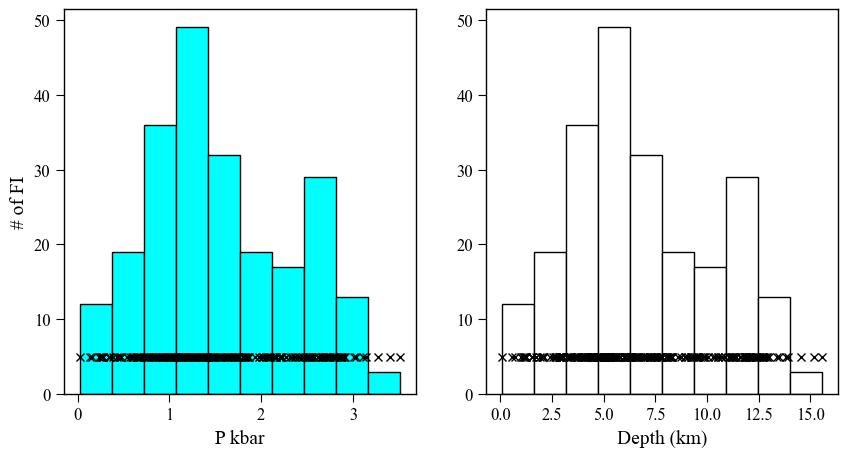

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Filter the data
filtered_data = kamaehu_PMC[~kamaehu_PMC['filename'].str.contains('FG')]

# Plotting
ax1.hist(filtered_data['Mean_MC_P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(filtered_data['Mean_MC_P_kbar'], filtered_data['Mean_MC_P_kbar'] * 0 + 5, 'xk')
ax2.plot(filtered_data['Mean_MC_D_km'], filtered_data['Mean_MC_P_kbar'] * 0 + 5, 'xk')
ax2.hist(filtered_data['Mean_MC_D_km'], ec='k', fc='white', bins=10)

# Set labels
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

plt.show()


In [25]:
from datetime import datetime

date_time_str = "2023-12-15T03:51:02.430Z"
date_time_obj = datetime.strptime(date_time_str, "%Y-%m-%dT%H:%M:%S.%fZ")

eqs=pd.read_csv("query.csv")

eqs['time'] = pd.to_datetime(eqs['time'], format="%Y-%m-%dT%H:%M:%S.%fZ")

eqs

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-04-02 18:51:37.600,19.051000,-155.364000,33.540,2.76,ml,42.0,209.0,0.1393,0.12,...,2024-04-07T18:19:23.040Z,"20 km SE of Pāhala, Hawaii",earthquake,0.50,0.75,0.088375,9.0,reviewed,hv,hv
1,2024-02-23 00:35:31.260,18.846333,-155.210000,10.780,3.27,ml,48.0,259.0,0.3891,0.13,...,2024-02-24T14:31:16.655Z,"46 km ESE of Naalehu, Hawaii",earthquake,0.51,0.68,0.187883,30.0,reviewed,hv,hv
2,2024-02-22 22:19:44.820,18.840667,-155.201333,9.710,3.04,ml,48.0,260.0,0.3986,0.14,...,2024-03-01T04:27:54.040Z,"47 km ESE of Naalehu, Hawaii",earthquake,0.59,0.60,0.153374,16.0,reviewed,hv,hv
3,2024-02-07 00:39:04.320,18.993333,-155.307667,8.310,2.57,ml,40.0,271.0,0.2176,0.22,...,2024-04-20T19:33:36.040Z,"29 km SE of Pāhala, Hawaii",earthquake,0.55,0.56,0.205284,16.0,reviewed,hv,hv
4,2024-02-05 12:28:25.520,18.865833,-155.206497,4.730,2.52,md,16.0,293.0,0.3761,0.15,...,2024-04-20T19:33:01.040Z,"45 km ESE of Naalehu, Hawaii",earthquake,0.90,1.25,0.190000,3.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1962-03-21 22:26:52.880,18.957667,-155.379833,2.533,2.85,ml,6.0,261.0,NaN,0.14,...,2020-03-31T18:31:05.600Z,"24 km ESE of Naalehu, Hawaii",earthquake,2.19,1.84,0.120000,4.0,reviewed,hv,hv
1543,1961-04-12 23:52:30.960,18.907000,-155.245667,8.389,3.53,ml,7.0,286.0,NaN,0.06,...,2020-03-31T18:51:09.100Z,"39 km ESE of Naalehu, Hawaii",earthquake,1.91,1.17,0.100000,2.0,reviewed,hv,hv
1544,1961-01-08 01:50:22.600,18.811667,-155.166500,5.911,3.32,ml,5.0,348.0,NaN,0.08,...,2020-03-31T18:30:53.010Z,"51 km ESE of Naalehu, Hawaii",earthquake,8.36,10.86,NaN,1.0,reviewed,hv,hv
1545,1960-07-16 03:41:24.910,18.739667,-155.104500,5.901,3.46,ml,6.0,325.0,NaN,0.08,...,2020-03-31T17:07:31.590Z,"61 km SE of Naalehu, Hawaii",earthquake,8.18,10.59,0.220000,4.0,reviewed,hv,hv


Text(0, 0.5, 'Frequency')

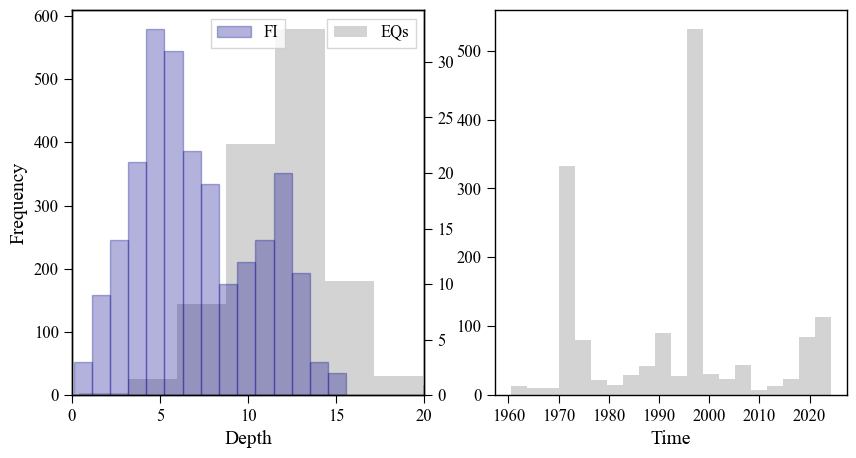

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

filtered_data = kamaehu_PMC[~kamaehu_PMC['filename'].str.contains('FG|MI')]

ax1.hist(eqs['depth'], ec='none', fc='lightgrey', bins=20,label='EQs')
ax2.hist(eqs['time'], ec='none', fc='lightgrey', bins=20)
twinax=ax1.twinx()
twinax.hist(filtered_data['Mean_MC_D_km'], ec='darkblue', fc='darkblue', bins=15,alpha=0.3,label='FI')

ax1.legend()
twinax.legend(loc='upper center')
ax1.set_xlabel('Depth')
ax1.set_xlim([0,20])
ax2.set_xlabel('Time')
ax1.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

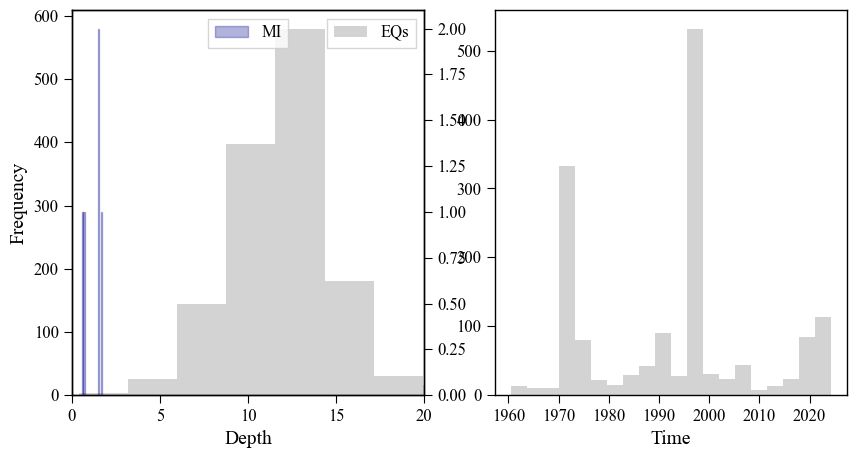

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

filtered_data = kamaehu_PMC[~(kamaehu_PMC['filename'].str.contains('FG'))&(kamaehu_PMC['filename'].str.contains('MI'))]

ax1.hist(eqs['depth'], ec='none', fc='lightgrey', bins=20,label='EQs')
ax2.hist(eqs['time'], ec='none', fc='lightgrey', bins=20)
twinax=ax1.twinx()
twinax.hist(filtered_data['Mean_MC_D_km'], ec='darkblue', fc='darkblue', bins=15,alpha=0.3,label='MI')

ax1.legend()
twinax.legend(loc='upper center')
ax1.set_xlabel('Depth')
ax1.set_xlim([0,20])
ax2.set_xlabel('Time')
ax1.set_ylabel('Frequency')

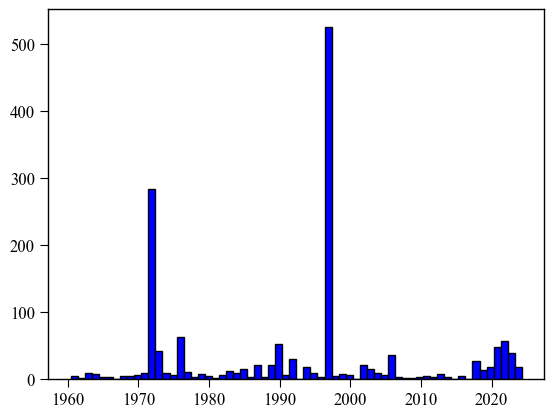

In [28]:
plt.hist(eqs['time'], ec='k', fc='blue', bins=64)
plt.show()